# 한국어뉴스기사 NLP
### 2018. 11. 24. PASTEL HACKATHON

---------------------


In [2]:
import os
import pprint
import konlpy
from os.path import isfile, join

dir_path = './newsData/'
dir_list = os.listdir(dir_path)
    # ㄴ['0', '1', '2', '3', '4', '5', '6', '7']
dir_to_fns = dict() # {dir0: [fn1, fn2,..], .., dir7: [fn1, fn2,..]}
max_txt_cnt = 50 #총 200개 중 50개만 추출

for d in dir_list:
    file_list = os.listdir(dir_path + d)
    dir_to_fns[int(d)] = file_list[:max_txt_cnt]
    # 각 디렉토리 별로 50개 텍스트 파일(명)만 저장! 
print("directories: \n", list(dir_to_fns.keys()))
print("\n ㄴfile names (length: {}):\n".format(len(dir_to_fns[0])), dir_to_fns[0])
    # dir_filenames | { 0: [], 1: [], .., 7: [] }
    # ㄴdir_filenames[0]: 디렉토리 0에 포함된 txt 파일명 리스트

directories: 
 [0, 1, 2, 3, 4, 5, 6, 7]

 ㄴfile names (length: 50):
 ['0000NewsData.txt', '0001NewsData.txt', '0002NewsData.txt', '0003NewsData.txt', '0004NewsData.txt', '0005NewsData.txt', '0006NewsData.txt', '0007NewsData.txt', '0008NewsData.txt', '0009NewsData.txt', '0010NewsData.txt', '0011NewsData.txt', '0012NewsData.txt', '0013NewsData.txt', '0014NewsData.txt', '0015NewsData.txt', '0016NewsData.txt', '0017NewsData.txt', '0018NewsData.txt', '0019NewsData.txt', '0020NewsData.txt', '0021NewsData.txt', '0022NewsData.txt', '0023NewsData.txt', '0024NewsData.txt', '0025NewsData.txt', '0026NewsData.txt', '0027NewsData.txt', '0028NewsData.txt', '0029NewsData.txt', '0030NewsData.txt', '0031NewsData.txt', '0032NewsData.txt', '0033NewsData.txt', '0034NewsData.txt', '0035NewsData.txt', '0036NewsData.txt', '0037NewsData.txt', '0038NewsData.txt', '0039NewsData.txt', '0040NewsData.txt', '0041NewsData.txt', '0042NewsData.txt', '0043NewsData.txt', '0044NewsData.txt', '0045NewsData.txt', '0046NewsD

----------------------------------------
### # Read files & merge documents

`0
 └0000NewsData
 └0001NewsData
 └0002NewsData
    ...
 └0199NewsData`
 
`1
 └1000NewsData
 └1001NewsData
 └1002NewsData
    ...
 └1199NewsData
 `
  ...
 

In [3]:
import codecs #

dirs = list(dir_to_fns.keys()) # [0, 1, 2,..,7]
cat_to_doc = {} # {0: merged_doc0, 1: merged_doc1, ..}
for i in range(len(dirs)): # i == 0 ~ 7; categories
    merged_doc = ""
    for j in range(max_txt_cnt): # j == 0 ~ 99; files
        fn = dir_to_fns[i][j] 
        # ㄴe.g. "0000NewsData.txt"
        full_path = dir_path + "{}/{}".format(str(i), fn) 
        # ㄴe.g. "./dataset/koreanNews/0/0000NewsData.txt"
        doc = codecs.open(full_path, "r", "utf-8").read()
        merged_doc += doc
    cat_to_doc[i] = merged_doc
    
print(cat_to_doc[0][:500])

동남아 담당' 北 최희철 부상 베이징 도착…싱가포르행 주목	최 부상, 행선지·방문 목적 질문에는 '묵묵부답'

(베이징=연합뉴스) 김진방 특파원 = 북한이 북미 정상회담 무산 가능성까지 거론하며 강경한 태도를 보이는 가운데 동남아시아 외교를 담당하는 최희철 북한 외무성 부상이 19일 중국 베이징 서우두(首都) 공항에 모습을 드러냈다.

최 부상은 이날 오전 평양발 고려항공 JS151편을 이용해 베이징 서우두 공항에 도착했다.

최 부상은 최종 목적지를 묻는 취재진의 질문에 아무런 답변을 하지 않고, 북한 대사관 관계자들과 함께 공항을 빠져나갔다.

북미 정상회담을 20여 일 앞둔 상황에서 동남아 외교통인 최 부상이 정상회담 준비 등을 위해 회담 개최 예정지인 싱가포르를 방문할 가능성도 제기되고 있다.

최 부상은 지난 3월에도 아세안(ASEAN·동남아시아국가연합) 의장국이기도 한 싱가포르를 방문해 양국관계와 올해 8월 열리는 아세안지역안보포럼(ARF) 의제 등을 논의한 바 있다.




----------------------------------------
### # 형태소 분석, 명사추출: KoNLPy

In [5]:
# Tag Package: http://konlpy.org/en/v0.4.4/api/konlpy.tag/ 
from konlpy.tag import Twitter

twitter = Twitter()
#ONLY ONE CATEGORY (e.g.) 0: 정치#
nouns = twitter.nouns(cat_to_doc[0])
nouns = [n for n in nouns if len(n) > 1]
print(nouns[:50])

['동남아', '담당', '최희', '부상', '베이징', '도착', '싱가포르', '주목', '부상', '행선', '방문', '목적', '질문', '묵묵', '베이징', '연합뉴스', '김진', '특파원', '북한', '북미', '정상회담', '무산', '가능성', '거론', '태도', '가운데', '동남아시아', '외교', '담당', '최희', '북한', '외무성', '부상', '중국', '베이징', '서우', '공항', '모습', '부상', '오전', '평양', '고려항공', '이용', '베이징', '서우', '공항', '도착', '부상', '최종', '목적지']


In [6]:
from collections import Counter

#---Counter E.g.---#
# sent = 'apple apple bananas apple'
# words = sent.split()
#  > ['apple', 'apple', 'bananas', 'apple']
# Counter(words)
#  > Counter({'apple': 3, 'bananas': 1})

count = Counter(nouns) 
tags = count.most_common(100)
    # ㄴ가장 많이 등장한 N개 구하기
print(tags)

[('북한', 187), ('후보', 141), ('회담', 94), ('대통령', 94), ('의원', 90), ('훈련', 81), ('대해', 70), ('미국', 68), ('기자', 63), ('드루', 63), ('관련', 60), ('남북', 60), ('우리', 59), ('위원장', 58), ('정부', 58), ('대한', 54), ('정상회담', 53), ('주장', 53), ('통해', 53), ('입장', 50), ('수사', 48), ('한국', 47), ('특검', 47), ('북미', 45), ('지난', 45), ('고위', 45), ('김경수', 42), ('발언', 40), ('청와대', 40), ('검찰', 39), ('라며', 39), ('대표', 38), ('민주당', 36), ('한미', 36), ('다시', 36), ('공천', 35), ('서울', 34), ('사건', 33), ('비난', 33), ('판문점', 33), ('사실', 33), ('광주', 32), ('맥스', 32), ('댓글', 32), ('여야', 31), ('선언', 31), ('미래', 31), ('관계자', 30), ('국회', 30), ('검사', 30), ('당국', 30), ('사단', 29), ('선더', 29), ('문제', 28), ('위원회', 28), ('예정', 28), ('자신', 28), ('연기', 28), ('통일부', 28), ('회의', 27), ('폐기', 27), ('기념', 27), ('가능성', 26), ('자유', 26), ('공군', 26), ('남조선', 26), ('장관', 26), ('편지', 26), ('진행', 25), ('문재인', 25), ('조사', 25), ('정치', 25), ('합의', 24), ('당시', 24), ('선거', 24), ('강조', 24), ('이후', 23), ('리선', 23), ('중앙', 23), ('트럼프', 23), ('평화', 22), ('계리', 22)

----------------------------------------
### # 시각화: Word Cloud

{'북한': 187, '후보': 141, '회담': 94, '대통령': 94, '의원': 90, '훈련': 81, '대해': 70, '미국': 68, '기자': 63, '드루': 63, '관련': 60, '남북': 60, '우리': 59, '위원장': 58, '정부': 58, '대한': 54, '정상회담': 53, '주장': 53, '통해': 53, '입장': 50, '수사': 48, '한국': 47, '특검': 47, '북미': 45, '지난': 45, '고위': 45, '김경수': 42, '발언': 40, '청와대': 40, '검찰': 39, '라며': 39, '대표': 38, '민주당': 36, '한미': 36, '다시': 36, '공천': 35, '서울': 34, '사건': 33, '비난': 33, '판문점': 33, '사실': 33, '광주': 32, '맥스': 32, '댓글': 32, '여야': 31, '선언': 31, '미래': 31, '관계자': 30, '국회': 30, '검사': 30, '당국': 30, '사단': 29, '선더': 29, '문제': 28, '위원회': 28, '예정': 28, '자신': 28, '연기': 28, '통일부': 28, '회의': 27, '폐기': 27, '기념': 27, '가능성': 26, '자유': 26, '공군': 26, '남조선': 26, '장관': 26, '편지': 26, '진행': 25, '문재인': 25, '조사': 25, '정치': 25, '합의': 24, '당시': 24, '선거': 24, '강조': 24, '이후': 23, '리선': 23, '중앙': 23, '트럼프': 23, '평화': 22, '계리': 22, '이번': 21, '전략': 21, '사람': 21, '조작': 21, '상황': 20, '처리': 20, '행사': 20, '반박': 20, '유감': 20, '국민': 20, '김씨': 20, '총리': 20, '위해': 19, '전날': 19, '보고': 19, '요구': 19, '김

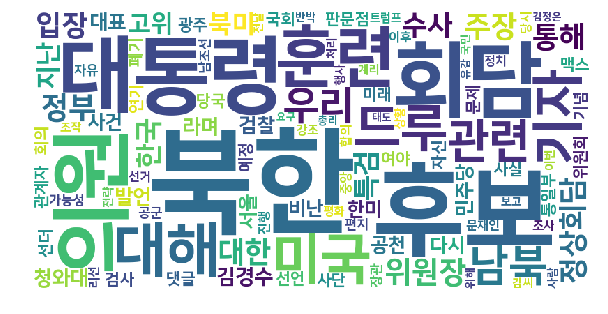

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = './font/NanumSquareEB.ttf'
wc = WordCloud(
                font_path=font_path, 
                background_color='white',
                width=800, height=400
              )
cloud = wc.generate_from_frequencies(dict(tags))
print(dict(tags))
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

----------------------------------------
----------------------------------------


### # 간단한 워드클라우드 함수 생성


In [9]:
from konlpy.tag import Twitter
from collections import Counter

def wordcloud(cat_nm, font_path, bg_color): #cat_num: 0 ~ 7 
    '''
    * intput: cat_num, font_path, bg_color
           ㄴcat_nm: category name e.g. 경제
           ㄴfont_path: 컴퓨터상의 폰트 위치
           ㄴbg_color: 워드클라우드의 배경 색상
           
    * output: word cloud 
    '''
    cat_to_num = {"정치": 0, "경제": 1, "사회": 2, "생활문화": 3, "세계": 4, "기술": 5, "연예": 6, "스포츠": 7}
    twitter = Twitter()
    nouns = twitter.nouns(cat_to_doc[cat_to_num[cat_nm]])
    nouns = [n for n in nouns if len(n) > 1]
    count = Counter(nouns)
    tags = count.most_common(150)
    print('٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..')
    wc = WordCloud(
                    font_path=font_path, 
                    background_color=bg_color,
                    width=800, height=400
                  )
    cloud = wc.generate_from_frequencies(dict(tags))
    #print(dict(tags))
    print("\n└[{}] 카테고리의 워드클라우드 결과는 아래와 같습니다.".format(cat_nm))
    plt.figure(figsize=(10, 10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()

-----------------------------
　
### # TEST: 경제

٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..

└[경제] 카테고리의 워드클라우드 결과는 아래와 같습니다.


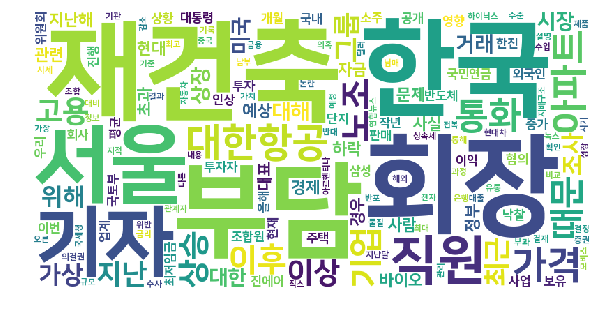

In [12]:
font_path = './font/NanumSquareEB.ttf'
bg_color = 'white'
wordcloud('경제', font_path, bg_color)

### # TEST: 세계

٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..

└[세계] 카테고리의 워드클라우드 결과는 아래와 같습니다.


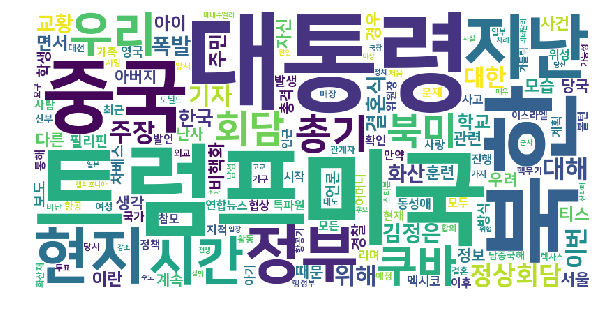

In [13]:
wordcloud('세계', font_path, bg_color)

### # TEST: 기술

٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..

└[기술] 카테고리의 워드클라우드 결과는 아래와 같습니다.


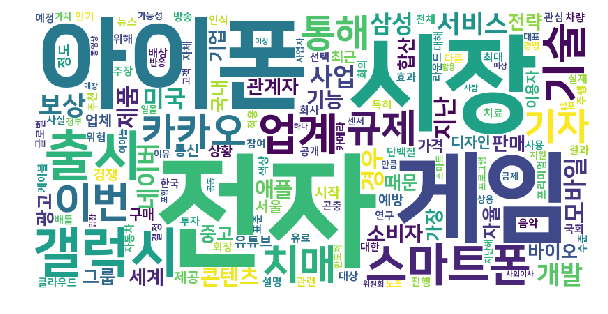

In [14]:
wordcloud('기술', font_path, bg_color)

### # TEST: 연예

٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..

└[연예] 카테고리의 워드클라우드 결과는 아래와 같습니다.


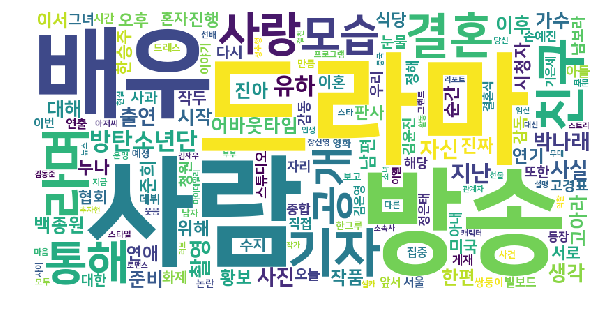

In [15]:
wordcloud('연예', font_path, bg_color)

### # TEST: 스포츠

٩꒰｡•◡•｡꒱۶ Word Cloud 생성중입니다..

└[스포츠] 카테고리의 워드클라우드 결과는 아래와 같습니다.


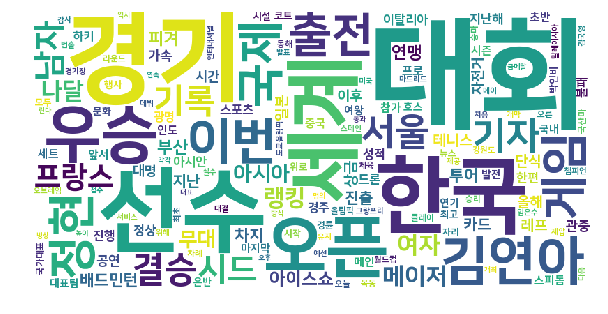

In [16]:
wordcloud('스포츠', font_path, bg_color)

`@PASTEL HACKATHON`